In [2]:
import pandas as pd
import numpy as np


dayColumns=["date", "maxtempC", "maxtempF", "mintempC", "mintempF", "sunrise", "sunset", "moonrise", "moonset", "moon_phase", "moon_illumination"]
dailyWeather=pd.read_csv("https://api.worldweatheronline.com/premium/v1/past-weather.ashx?q=new+york&tp=24&format=csv&key=10fbca6b178e4fafb0d165822210502&date=2011-01-01&enddate=2020-12-31", header = None, names = dayColumns, comment='#', skiprows = lambda x: x%2 == 1)
dailyWeather.head()


,date,maxtempC,maxtempF,mintempC,mintempF,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,2011-01-01,4,39,-1,30,07:20 AM,04:39 PM,04:51 AM,02:13 PM,Waning Crescent,15
1,2011-01-02,5,42,1,34,07:20 AM,04:40 PM,05:51 AM,03:09 PM,Waning Crescent,7
2,2011-01-03,1,33,-4,25,07:20 AM,04:41 PM,06:43 AM,04:09 PM,Waning Crescent,0
3,2011-01-04,3,37,-4,26,07:21 AM,04:42 PM,07:27 AM,05:13 PM,New Moon,0
4,2011-01-05,2,36,-3,26,07:21 AM,04:43 PM,08:04 AM,06:16 PM,New Moon,0


In [3]:

dayAverageColumns=["date", "time", "tempC", "tempF", "windspeedMiles", "windspeedKmph", "winddirdegree","winddir16point", "weatherCode", "weatherIconUrl", "weatherDesc", "precipMM", "precipInches", "humidity", "visibilityKm", "visibilityMiles", "pressureMB", "pressureInches", "cloudcover", "HeatIndexC", "HeatIndexF", "DewPointC", "DewPointF", "WindChillC", "WindChillF", "WindGustMiles","WindGustKmph","FeelsLikeC",  "FeelsLikeF"]
dailyAverageWeather=pd.read_csv("https://api.worldweatheronline.com/premium/v1/past-weather.ashx?q=new+york&tp=24&format=csv&key=10fbca6b178e4fafb0d165822210502&date=2011-01-01&enddate=2020-12-31", header = None, names = dayAverageColumns, comment='#', skiprows = lambda x: x%2 == 0)
dailyAverageWeather.head(3)

,date,time,tempC,tempF,windspeedMiles,windspeedKmph,winddirdegree,winddir16point,weatherCode,weatherIconUrl,...,HeatIndexC,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF
0,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-01,24.0,4.0,39.0,6.0,10.0,224.0,SW,248.0,http://cdn.worldweatheronline.com/images/wsymb...,...,3.0,37.0,3.0,37.0,1.0,33.0,13.0,21.0,1.0,33.0
2,2011-01-02,24.0,5.0,42.0,7.0,11.0,270.0,W,248.0,http://cdn.worldweatheronline.com/images/wsymb...,...,4.0,40.0,4.0,39.0,2.0,36.0,13.0,21.0,2.0,36.0


In [4]:
# from pandas.io.json import json_normalize

# dayColumns=["date", "maxtempC", "maxtempF", "mintempC", "mintempF", "sunrise", "sunset", "moonrise", "moonset", "moon_phase", "moon_illumination"]
weather=pd.read_json("https://api.worldweatheronline.com/premium/v1/past-weather.ashx?q=new+york&tp=24&format=json&key=10fbca6b178e4fafb0d165822210502&date=2011-01-01&enddate=2020-12-31")
# pd.json_normalize(weather)
# weather.head()

In [5]:
weather

,data
request,"[{'type': 'City', 'query': 'New York, United S..."
weather,"[{'date': '2011-01-01', 'astronomy': [{'sunris..."


In [5]:
pd.json_normalize(weather['data']['request'])

,type,query
0,City,"New York, United States of America"


In [7]:
nyc_weather = pd.json_normalize(weather['data']['weather'])
nyc_weather.head()

,date,astronomy,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,totalSnow_cm,sunHour,uvIndex,hourly
0,2011-01-01,"[{'sunrise': '07:20 AM', 'sunset': '04:39 PM',...",4,39,-1,30,2,36,0.0,3.4,1,"[{'time': '24', 'tempC': '4', 'tempF': '39', '..."
1,2011-01-02,"[{'sunrise': '07:20 AM', 'sunset': '04:40 PM',...",5,42,1,34,5,40,0.0,5.2,1,"[{'time': '24', 'tempC': '5', 'tempF': '42', '..."
2,2011-01-03,"[{'sunrise': '07:20 AM', 'sunset': '04:41 PM',...",1,33,-4,25,-2,29,0.0,8.7,2,"[{'time': '24', 'tempC': '1', 'tempF': '33', '..."
3,2011-01-04,"[{'sunrise': '07:21 AM', 'sunset': '04:42 PM',...",3,37,-4,26,-0,32,0.0,8.7,2,"[{'time': '24', 'tempC': '3', 'tempF': '37', '..."
4,2011-01-05,"[{'sunrise': '07:21 AM', 'sunset': '04:43 PM',...",2,36,-3,26,0,32,0.0,8.7,2,"[{'time': '24', 'tempC': '2', 'tempF': '36', '..."


In [11]:
nyc_weather['date'].min(), nyc_weather['date'].max()

('2011-01-01', '2011-02-04')

In [13]:
import matplotlib.pyplot as plt


In [22]:
nyc_weather.mintempF.min() # this is a string, need remember to cast these to int 

'11'

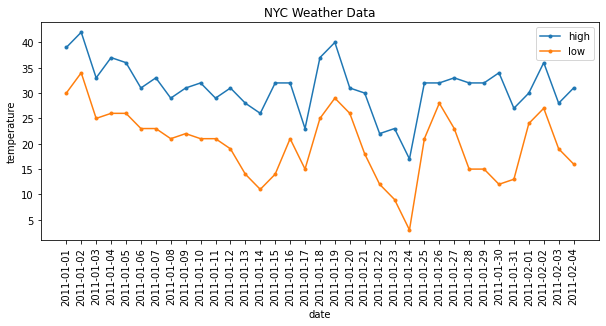

In [26]:
plt.figure(figsize=(10,4))
plt.plot(nyc_weather.date, nyc_weather.maxtempF.astype(int), '.-', label='high')
plt.plot(nyc_weather.date, nyc_weather.mintempF.astype(int), '.-', label='low')
plt.legend(); plt.xlabel('date'); plt.ylabel('temperature')
plt.xticks(rotation=90); 
plt.title('NYC Weather Data');

## we could display something like this on our website (prettier) for each park ?